In [1]:
### code to produce figures for An Informational Approach to Exoplanet Characterization [arXiv:2206.13344]
#by Sara Vannah

#package imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
import re

%matplotlib inline

In [2]:
#ANYTHING YOU NEED TO MODIFY FOR YOUR COMPUTER IS IN THIS CELL 


#change this to the directory your spectra are stored in
spectra_dir = '/Users/saravannah/Exo_Transmit/Spectra/'

path_temp = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_temp/'
path_grav = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_grav/'
path_planet_rad = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_planet_rad/'
path_star_rad = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_star_rad/'
path_rayleigh = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_rayleigh/'
path_metallicity = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_metallicity/'

# loading the super earth spectra
path_sup = '/Users/saravannah/Exo_Transmit/Spectra/supEarths_v2/'
path_hot = '/Users/saravannah/Exo_Transmit/Spectra/hotJups/'

# loading a 1200K jupiter like exoplanet
jup_1200_wave, jup_1200_trans = np.loadtxt('/Users/saravannah/betelgeuse/single_param_jup_variants/jup_temp/jupiter_1200K.txt', unpack=True, skiprows=2)

In [3]:
#load transit depth and wavelengths for Earth
jupiter_wave, jupiter_trans = np.loadtxt(spectra_dir+'jupiter.dat', unpack=True, skiprows=2)
earth_wave, earth_trans = np.loadtxt(spectra_dir+'earth.dat', unpack=True, skiprows=2)

In [4]:
#This cell is the Djs calculation
def get_djs(spec1, spec2):

    #compute modal fractions
    p, q = spec1/sum(spec1), spec2/sum(spec2)
    r = 1/2 * (p+q)

    Djs = 1/2 * np.sum(p*np.log(p/r)) + 1/2 * np.sum(q*np.log(q/r))

    return Djs

In [5]:
#bubble sort, adapted from https://www.geeksforgeeks.org/python-program-for-bubble-sort/
 
def bubbleSort(arr, names):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j + 1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                names[j], names[j+1] = names[j+1], names[j]

# The section below here is for creating Figure 1.

 For each parameter varied (temperature, surface gravity, planet radius, stellar radius, Rayleigh scattering factor, and metallicity), all of the spectra within the corresponding directory are read in and sorted. We then compute the $\mathcal{D}_{JS}$ of each spectrum compared to Earth and to Jupiter. 

In [6]:
def get_djs_by_parameter(path):
    
    #import all the spectra in the given directory
    names = listdir(path)

    #remove .DS_Store and any other weird file stuff
    names = [n for n in names if '.txt' in n]

    #organize spectra by increasing parameter value
    vals = []
    for n in names:
        #stellar and planet radii have scientific notation in their names; need to convert
        if 'radius' in n or 'rayleigh' in n:
            val_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
            val = int(val_list[0])*10**int(val_list[1]) #converts to scientific notation
        else:
            val = int(re.search(r'\d+', n).group()) #get the integer from name string
        vals.append(val) #append value of parameter to list
    bubbleSort(vals, names)

    #list to hold each of the spectra
    spectra = [np.loadtxt(path+n, unpack=True, skiprows=2) for n in names]

    #compute Djs relative to Earth
    djs_earth = []
    for n in range(len(spectra)):
        djs_earth.append(get_djs(spectra[n][1], earth_trans))

    #compute Djs relative to Jupiter
    djs_jupiter = []
    for n in range(len(spectra)):
        djs_jupiter.append(get_djs(spectra[n][1], jupiter_trans))
    
    
    return djs_earth, djs_jupiter, vals
    

In [7]:
temp_djs_earth, temp_djs_jupiter, temps = get_djs_by_parameter(path_temp)
grav_djs_earth, grav_djs_jupiter, gravs = get_djs_by_parameter(path_grav)
planet_rad_djs_earth, planet_rad_djs_jupiter, planet_rads = get_djs_by_parameter(path_planet_rad)
star_rad_djs_earth, star_rad_djs_jupiter, star_rads = get_djs_by_parameter(path_star_rad)
rayleigh_djs_earth, rayleigh_djs_jupiter, rayleighs = get_djs_by_parameter(path_rayleigh)

In [8]:
#organize metallicity by hand - the names are unusual
#but this process is the same as get_djs_by_parameter

names_metallicity = listdir(path_metallicity)
names_metallicity = [n for n in names_metallicity if '.dat' in n]

metallicities = []
for n in names_metallicity:
    
    x_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
    if len(x_list)>1:
        x = 10**(-int(x_list[1]))
    else: 
        x = int(x_list[0])
    metallicities.append(x) #append pressure integer to list
    
    
bubbleSort(metallicities, names_metallicity)    

spectra_metallicity = [np.loadtxt(path_metallicity+n, unpack=True, skiprows=2) for n in names_metallicity]


metallicity_djs_earth = []
for n in range(len(spectra_metallicity)):
    metallicity_djs_earth.append(get_djs(spectra_metallicity[n][1], earth_trans))
    
metallicity_djs_jupiter = []
for n in range(len(spectra_metallicity)):
    metallicity_djs_jupiter.append(get_djs(spectra_metallicity[n][1], jupiter_trans))

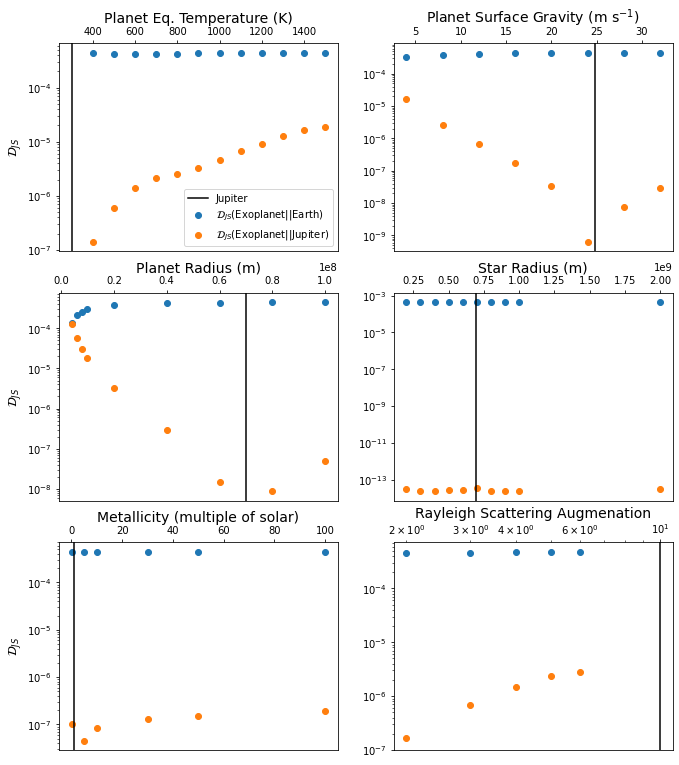

In [9]:
# creating a plot looking at how changing each of the 6 parameters affects D_js
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(11, 13))

# temperature
ax[0,0].scatter(temps, temp_djs_earth, label='$\mathcal{D}_{JS}$(Exoplanet||Earth)')
ax[0,0].scatter(temps, temp_djs_jupiter, label='$\mathcal{D}_{JS}$(Exoplanet||Jupiter)')
ax[0,0].set_xlabel('Planet Eq. Temperature (K)', fontsize=14)
ax[0,0].axvline(300, 0, 1, color='black', label='Jupiter')

# surface gravity
ax[0,1].scatter(gravs, grav_djs_earth)
ax[0,1].scatter(gravs, grav_djs_jupiter)
ax[0,1].set_xlabel('Planet Surface Gravity (m s$^{-1}$)', fontsize=14)
ax[0,1].axvline(24.79, 0, 1, color='black')

# planet radius
ax[1,0].scatter(planet_rads, planet_rad_djs_earth)
ax[1,0].scatter(planet_rads, planet_rad_djs_jupiter)
ax[1,0].set_xlabel('Planet Radius (m)', fontsize=14)
ax[1,0].axvline(6.99e7, 0, 1, color='black')

# star radius
ax[1,1].scatter(star_rads, star_rad_djs_earth)
ax[1,1].scatter(star_rads, star_rad_djs_jupiter)
ax[1,1].set_xlabel('Star Radius (m)', fontsize=14)
ax[1,1].axvline(6.96e8, 0, 1, color='black')


# metallicity
ax[2,0].scatter(metallicities, metallicity_djs_earth)
ax[2,0].scatter(metallicities, metallicity_djs_jupiter)
ax[2,0].set_xlabel('Metallicity (multiple of solar)', fontsize=14)
ax[2,0].axvline(1, 0, 1, color='black')

# Rayleigh scattering
ax[2,1].scatter(rayleighs, rayleigh_djs_earth)
ax[2,1].scatter(rayleighs, rayleigh_djs_jupiter)
ax[2,1].set_xlabel('Rayleigh Scattering Augmenation', fontsize=14)
ax[2,1].axvline(10, 0, 1, color='black')
ax[2,1].set_xscale('log')

ax[0,0].legend()


for i in range(3):
    ax[i,0].set_ylabel('$\mathcal{D}_{JS}$', fontsize=12)
    for j in range(2):
        ax[i,j].set_yscale('log')
        ax[i,j].xaxis.set_label_position('top')
        ax[i,j].xaxis.tick_top()




# The section below here is for creating Figures 2 and 3.

In [10]:
#get names of all the hot Jupiter and super-Earth files
names_hot = listdir(path_hot)
names_sup = listdir(path_sup)

#remove .DS_Store and any other weird file stuff
names_hot = [n for n in names_hot if '.dat' in n]
names_sup = [n for n in names_sup if '.dat' in n]

#load all the hot Jupiter and super-Earth spectra into lists
spectra_hot = [np.loadtxt(path_hot+n, unpack=True, skiprows=2) for n in names_hot]
spectra_sup = [np.loadtxt(path_sup+n, unpack=True, skiprows=2) for n in names_sup]

In [12]:
#just grabbed this from Stack Overflow
#https://stackoverflow.com/questions/2170900/get-first-list-index-containing-sub-string
#finds index in list of first element containing a particular substring
#helpful for parsing planet names into a dictionary

def index_containing_substring(the_list, substring):
    for i, s in enumerate(the_list):
        if substring in s:
              return i
    return -1

In [13]:
hot_Jups = {'HAT-P-1b':index_containing_substring(names_hot, '1b'), 
              'HAT-P-12b':index_containing_substring(names_hot, '12b'),
              'HD 189733b': index_containing_substring(names_hot, '1897'),
             'HD 209458b': index_containing_substring(names_hot, '20945'),
             'WASP-6b': index_containing_substring(names_hot, '6b'),
             'WASP-39b': index_containing_substring(names_hot, '39b'),
             'Simulated hot Jupiter 1': index_containing_substring(names_hot, 'sim1'),
             'Simulated hot Jupiter 2': index_containing_substring(names_hot, 'sim2'),
             'Simulated hot Jupiter 3': index_containing_substring(names_hot, 'sim3'),
             'Simulated hot Jupiter 4': index_containing_substring(names_hot, 'sim4')}

sup_Earths = {'Proxima b':index_containing_substring(names_sup, 'Proxima'), 
              'Trappist-1e':index_containing_substring(names_sup, 'Trappist'),
              'GJ 15 Ab': index_containing_substring(names_sup, 'GJ15'),
             'GJ 667 Cc': index_containing_substring(names_sup, 'GJ667'),
             'CD Cet b': index_containing_substring(names_sup, 'CD'),
             'EPIC 24983012b': index_containing_substring(names_sup, 'EPIC'),
             'Simulated super-Earth 1': index_containing_substring(names_sup, 'sim1'),
             'Simulated super-Earth 2': index_containing_substring(names_sup, 'sim2'),
             'Simulated super-Earth 3': index_containing_substring(names_sup, 'sim3'),
             'Simulated super-Earth 4': index_containing_substring(names_sup, 'sim4')}



In [14]:
#useful for assigning consistent colors to each exoplanet
#takes in a string - the name of the exoplanet
def get_color(string):
    colors = ['green', 'blue', 'red', 'orange', 'purple', 'cyan','pink','yellow', 'lime', 'olive']
    if 'Sim' in string:
        return 'gray'
    else:
        if string in hot_Jups.keys():
            return colors[hot_Jups[string]]
        else:
            return colors[sup_Earths[string]]
    

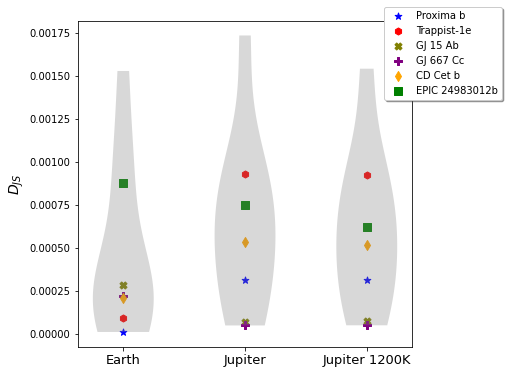

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

markers = ['s', '*', 'h', 'd','P','>','v','^','<','X']


#holder for djs distributions
super_earth_djs =[[],[],[]]
#for every exoplanet in the super-Earths list
for key in sup_Earths.keys():
    #get djs values comparing to Earth, Jupiter, and a 12K Jupiter
    djs_supearth_earth = get_djs(spectra_sup[sup_Earths[key]][1], earth_trans)
    djs_supearth_jupiter = get_djs(spectra_sup[sup_Earths[key]][1], jupiter_trans)
    djs_supearth_jupiter12k = get_djs(spectra_sup[sup_Earths[key]][1], jup_1200_trans)
    #append djs values to lists to that hold them (for plotting later)
    super_earth_djs[0].append(djs_supearth_earth)
    super_earth_djs[1].append(djs_supearth_jupiter)
    super_earth_djs[2].append(djs_supearth_jupiter12k)
    
    
    #plot djs values (note only need to be labeled once)
    if 'Sim' not in key:
        ax.scatter(0, djs_supearth_earth, marker=markers[sup_Earths[key]], s=50, color=get_color(key), label=key)
        ax.scatter(1, djs_supearth_jupiter, marker=markers[sup_Earths[key]], s=50, color=get_color(key))
        ax.scatter(2, djs_supearth_jupiter12k, marker=markers[sup_Earths[key]], s=50, color=get_color(key))
               

    
#add violin plots
v1 = ax.violinplot(super_earth_djs[0], [0], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='gray')
v2 =ax.violinplot(super_earth_djs[1], [1], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='gray')
v3 =ax.violinplot(super_earth_djs[2], [2], points=100, widths=0.5, showextrema=False)
plt.setp(v3['bodies'], facecolor='gray')

#make it pretty
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Super Earth vs Earth', 'Super Earth vs Earth', 'Super Earth vs Jupiter'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'], fontsize=13)
ax.set_ylabel('$D_{JS}$', size=14)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.9),shadow=True)

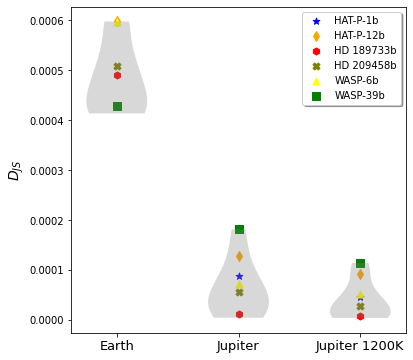

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

markers = ['s', '*', 'h', 'd','P','>','v','^','<','X']


#holder for djs distributions
hot_jup_djs =[[],[],[]]
#for every hot Jupiter in list of hot Jupiters
for key in hot_Jups.keys():  
    #get djs values comparing to Earth, Jupiter, and a 12K Jupiter
    djs_hotjup_earth = get_djs(spectra_hot[hot_Jups[key]][1], earth_trans)
    djs_hotjup_jupiter = get_djs(spectra_hot[hot_Jups[key]][1], jupiter_trans)
    djs_hotjup_jupiter12k = get_djs(spectra_hot[hot_Jups[key]][1], jup_1200_trans)
    #append djs values to lists to that hold them (for plotting later)
    hot_jup_djs[0].append(djs_hotjup_earth)
    hot_jup_djs[1].append(djs_hotjup_jupiter)
    hot_jup_djs[2].append(djs_hotjup_jupiter12k)
    
    #plot djs values (note only need to be labeled once)
    if 'Sim' not in key:
        ax.scatter(0, djs_hotjup_earth, marker=markers[hot_Jups[key]], s=50, color=get_color(key), label=key)
        ax.scatter(1, djs_hotjup_jupiter, marker=markers[hot_Jups[key]], color=get_color(key), s=50)
        ax.scatter(2, djs_hotjup_jupiter12k, marker=markers[hot_Jups[key]], color=get_color(key), s=50)
               

    
#add violin plots
v1 = ax.violinplot(hot_jup_djs[0], [0], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='gray')
v2 =ax.violinplot(hot_jup_djs[1], [1], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='gray')
v3 =ax.violinplot(hot_jup_djs[2], [2], points=100, widths=0.5, showextrema=False)
plt.setp(v3['bodies'], facecolor='gray')
    
#make it pretty
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Super Earth vs Earth', 'Super Earth vs Earth', 'Super Earth vs Jupiter'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'], fontsize=13)
ax.set_ylabel('$D_{JS}$', size=14)
ax.legend(shadow=True)